In [1]:
#Resimlere erişmek için kullanılır.
import glob
import os
import numpy as np
import seaborn as sns
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Global'in kısaltması olan glob modülü,
# belirli bir dosya modeli veya adıyla eşleşen dosyaları aramak için kullanılan bir işlevdir.
# CSV dosyalarını aramak ve dosyalardaki metinleri aramak için kullanılabilir.
imgs = glob.glob("./img/*.png")


In [3]:
width = 125
height = 50

X = []
Y = []

In [10]:
for img in imgs:
    # Dosya ismi alınır
    filename = os.path.basename(img)
    # Basılmış klavye ismi alınır
    label = filename.split("_")[0]
    # im değerleri 0 ile 1 aralığında değer alınır ki aykırı değerleri önlemek için.
    im = np.array(Image.open(img).convert("L").resize((width,height)))
    im = im / 255
    X.append(im)
    Y.append(label)

In [12]:
print(X[0],Y[0])

[[0.96862745 0.96862745 0.96862745 ... 0.96862745 0.96862745 0.96862745]
 [0.96862745 0.96862745 0.96862745 ... 0.96862745 0.96862745 0.96862745]
 [0.96862745 0.96862745 0.96862745 ... 0.96862745 0.96862745 0.96862745]
 ...
 [0.89803922 0.90196078 0.90588235 ... 0.90588235 0.90196078 0.90196078]
 [0.70980392 0.83137255 0.98039216 ... 0.98039216 0.90980392 0.8745098 ]
 [0.94901961 0.95686275 0.97254902 ... 0.96862745 0.96470588 0.96078431]] down


In [16]:
X = np.array(X)
# 1 in tek amacı cnn'in kabul etmesi için
X = X.reshape(X.shape[0],width,height,1)
X.shape

(597, 125, 50, 1)

<AxesSubplot:ylabel='count'>

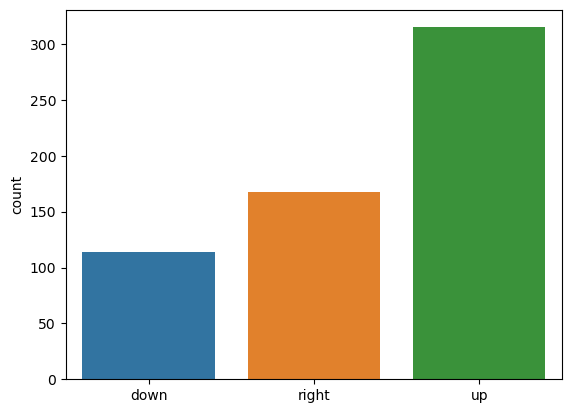

In [17]:
sns.countplot(Y)

In [18]:
# verilerimizin bilgisayar için daha anlaşılır hale getirmek için etiket yapmak
def onehot_labels(values):
    le = LabelEncoder()
    integer_encoded = le.fit_transform(values)
    ohe = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = ohe.fit_transform(integer_encoded)
    
    return onehot_encoded
    

In [19]:
Y = onehot_labels(Y)
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.25,random_state=2)

In [9]:
# Verilerimizi eğitilmesi için gerekli derin ağları ayarlıyoruz
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape = (width,height,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(3,activation="softmax"))


model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics = ["accuracy"])

In [10]:
# Eğitim aşaması
model.fit(train_X,train_y,epochs=35,batch_size=64)

score_train = model.evaluate(train_X,train_y)
print("Eğitim Doğruluğu: %",score_train[1] * 100)

score_test = model.evaluate(test_X,test_y)
print("Test Doğruluğu: %",score_test[1] * 100)





Epoch 1/35
3/3 [==============================] - 1s 254ms/step - loss: 4.8662 - accuracy: 0.3624
Epoch 2/35
3/3 [==============================] - 1s 243ms/step - loss: 1.9410 - accuracy: 0.4564
Epoch 3/35
3/3 [==============================] - 1s 223ms/step - loss: 1.1570 - accuracy: 0.5906
Epoch 4/35
3/3 [==============================] - 1s 230ms/step - loss: 0.7559 - accuracy: 0.5705
Epoch 5/35
3/3 [==============================] - 1s 258ms/step - loss: 0.6119 - accuracy: 0.7315
Epoch 6/35
3/3 [==============================] - 1s 233ms/step - loss: 0.5602 - accuracy: 0.7651
Epoch 7/35
3/3 [==============================] - 1s 284ms/step - loss: 0.4451 - accuracy: 0.8456
Epoch 8/35
3/3 [==============================] - 1s 264ms/step - loss: 0.3734 - accuracy: 0.8859
Epoch 9/35
3/3 [==============================] - 1s 279ms/step - loss: 0.3442 - accuracy: 0.8993
Epoch 10/35
3/3 [==============================] - 1s 310ms/step - loss: 0.2281 - accuracy: 0.9262
Epoch 11/35
3/3 [==

In [11]:
# Modellerimizi ilgili yerlerimize kaydediyoruz.
open("model_new.json","w").write(model.to_json())
model.save_weights("trex_weight_new.h5")